In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
planes = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/planes.csv")
planes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


# Generating new features
Sometimes the format of our data can limit our ability to detect relationships or inhibit the potential performance of machine learning models. One method to overcome these issues is to generate new features from our data!

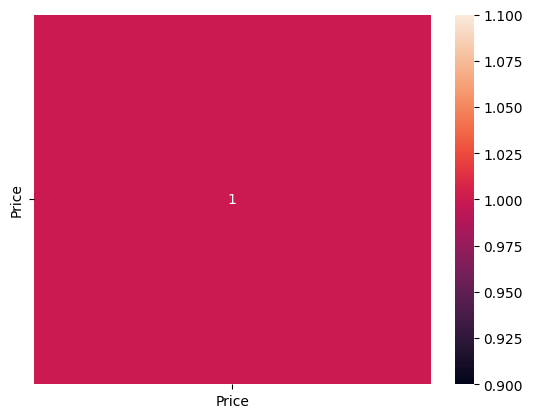

In [14]:
sns.heatmap(planes.select_dtypes(exclude="object").corr(), annot=True)
plt.show()
# we should extract the other numerical variables

In [15]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [16]:
print(planes["Date_of_Journey"].head(2), '\n')
print(planes["Dep_Time"].head(2), '\n')
print(planes["Arrival_Time"].head(2), '\n')
print(planes["Duration"].head(2), '\n')
# We are setting the dropna parameter to false to check for any missing entries
print(planes["Total_Stops"].value_counts(dropna=False), '\n')

0     9/06/2019
1    12/05/2019
Name: Date_of_Journey, dtype: object 

0    09:25
1    18:05
Name: Dep_Time, dtype: object 

0    04:25 10 Jun
1           23:30
Name: Arrival_Time, dtype: object 

0       19h
1    5h 25m
Name: Duration, dtype: object 

Total_Stops
1 stop      5503
non-stop    3411
2 stops     1488
NaN          212
3 stops       45
4 stops        1
Name: count, dtype: int64 



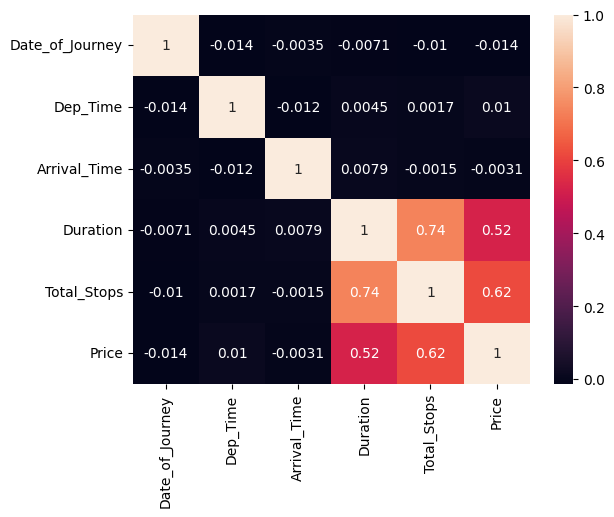

In [17]:
planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"], format="%d/%m/%Y")

planes["Dep_Time"] = planes["Dep_Time"].apply(lambda t: np.nan if pd.isna(t) else t[:5]) 
planes["Dep_Time"] = pd.to_datetime(planes["Dep_Time"], format="%H:%M")

planes["Arrival_Time"] = planes["Arrival_Time"].apply(lambda t: np.nan if pd.isna(t) else t[:5]) 
# errors='coerce' → If a value does not match the expected format, it will be converted to NaT (Not a Time), 
# which is pandas' equivalent of NaN for datetime objects.
planes["Arrival_Time"] = pd.to_datetime(planes["Arrival_Time"], format="%H:%M")

def convert_to_hours(duration):
	if pd.isna(duration):
		return np.nan
	
	hours = 0
	minutes = 0
	
	parts = duration.split()
	
	for part in parts:
		if 'h' in part:
			hours += float(part.replace('h', ''))
		elif 'm' in part:    
			minutes += float(part.replace('m', ''))
			
	total_hours = hours + (minutes / 60)
	return total_hours

planes["Duration"] = planes["Duration"].apply(convert_to_hours)

planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stops", '')
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stop", '')
planes["Total_Stops"] = planes["Total_Stops"].str.replace("non-stop", '0')
# I converted to `float`, not `int`, as there are some NaN values and they are considered floats in pandas in Python 
# and cannot be converted directly to `int`
planes["Total_Stops"] = planes["Total_Stops"].astype(float) 

sns.heatmap(planes.select_dtypes(exclude="object").corr(), annot=True)
plt.show()

In [18]:
planes["Dep_Time"]

0       1900-01-01 09:25:00
1       1900-01-01 18:05:00
2       1900-01-01 16:50:00
3       1900-01-01 09:00:00
4       1900-01-01 18:55:00
                ...        
10655   1900-01-01 19:55:00
10656   1900-01-01 20:45:00
10657                   NaT
10658   1900-01-01 11:30:00
10659   1900-01-01 10:55:00
Name: Dep_Time, Length: 10660, dtype: datetime64[ns]

In [19]:
planes["Arrival_Time"]

0       1900-01-01 04:25:00
1       1900-01-01 23:30:00
2       1900-01-01 21:35:00
3       1900-01-01 11:25:00
4       1900-01-01 10:25:00
                ...        
10655   1900-01-01 22:25:00
10656   1900-01-01 23:20:00
10657   1900-01-01 11:20:00
10658   1900-01-01 14:10:00
10659   1900-01-01 19:15:00
Name: Arrival_Time, Length: 10660, dtype: datetime64[ns]

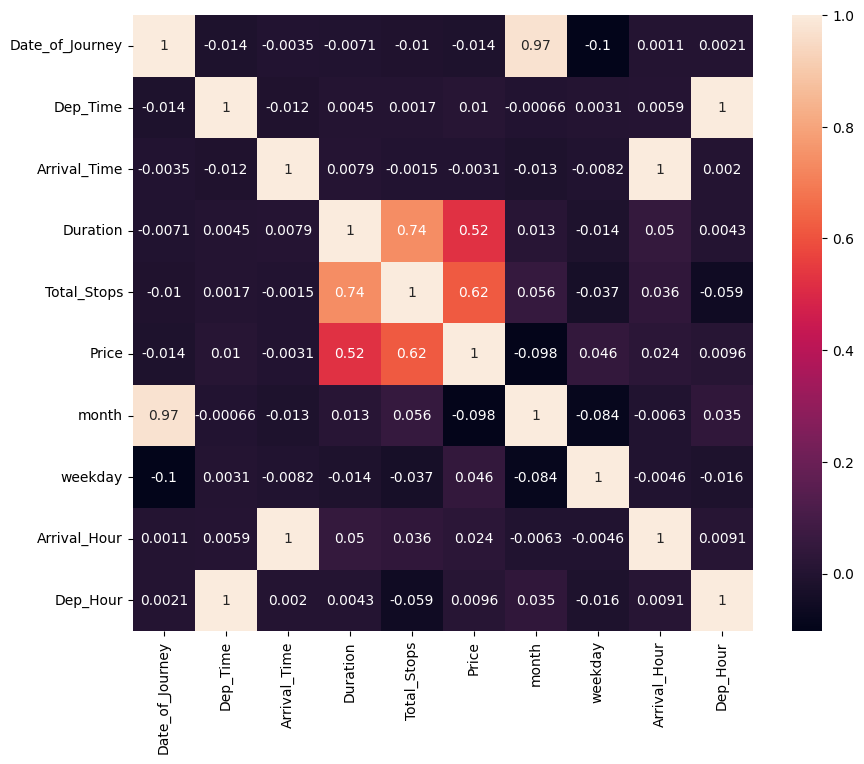

In [20]:
# If we think prices vary per month, it's worth using this attribute - we create it as a column in our DataFrame. 
# Perhaps prices might also differ depending on the day of the week?
planes["month"] = planes["Date_of_Journey"].dt.month
planes["weekday"] = planes["Date_of_Journey"].dt.weekday # returns values of zero, representing Monday, through to six, for Sunday
# planes["weekday"] = planes["Date_of_Journey"].dt.day_name() # returns the day name

# We might wonder if people tend to pay more to depart or arrive at more convenient times.
planes["Arrival_Hour"] = planes["Arrival_Time"].dt.hour
planes["Dep_Hour"] = planes["Dep_Time"].dt.hour

plt.figure(figsize=(10, 8))
sns.heatmap(planes.select_dtypes(exclude="object").corr(), annot=True)
plt.show()
# unfortunately there aren't any new strong relationships. But we wouldn't have known this if we hadn't generated these features.

# Creating categories

There's one more technique we can use to generate new features

We can create a new column by grouping **numeric** data and label them as classes using `pd.cut(Series, labels=, bins=)` 

We can create a new column by grouping **categorical** data and label them as classes using `np.select(conditionList, choiceList, default=)`

-	OR: we can use `.replace({"value_to_be_replaced": "desired_value"})` 

     Price      Ticket_Type
0  13882.0      First Class
1   6218.0  Premium Economy
2  13302.0      First Class
3   3873.0          Economy
4  11087.0   Business Class


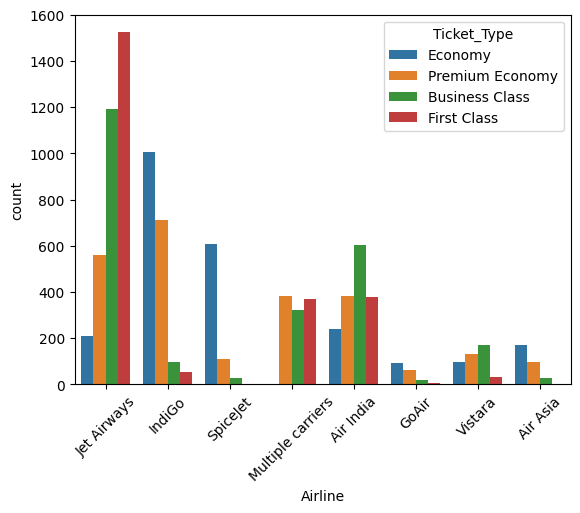

In [21]:
mn = planes["Price"].min()
q1 = planes["Price"].quantile(0.25)
q2 = planes["Price"].median()
q3 = planes["Price"].quantile(0.75)
mx = planes["Price"].max()

labels = ["Economy", "Premium Economy", "Business Class", "First Class"]
bins = [mn, q1, q2, q3, mx] # you can use `mx` or `np.inf`

# Split planes["Price"] based on the labels and bins (ranges) we've created.
planes["Ticket_Type"] = pd.cut(planes["Price"], labels=labels, bins=bins)

print(planes[["Price", "Ticket_Type"]].head())

sns.countplot(data=planes, x="Airline", hue="Ticket_Type")
plt.xticks(rotation=45)
plt.show()
# Looks like Jet Airways has the largest number of "First Class" tickets, while most of IndiGo and SpiceJet's flights are "Economy".